In [1]:
import pickle

import humanize
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.utils import shuffle

%matplotlib inline
%load_ext autoreload

In [2]:
# Oversampled
timestamp = '20180509221611'
final_features = pd.read_pickle('./final_features-{}.pkl'.format(timestamp))
outcomes = pd.read_pickle('./labels-{}.pkl'.format(timestamp))

In [4]:
# Non-oversamled
# timestamp = '20180509221611'
# final_features = pd.read_pickle('./final_features-{}-non_oversampled.pkl'.format(timestamp))
# outcomes = pd.read_pickle('./labels-{}-non_oversampled.pkl'.format(timestamp))

In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encoded_outcomes = le.fit_transform(outcomes)

In [4]:
# Take out 5% of data for final final testing; shuffle first

final_features['stop_outcome'] = encoded_outcomes
final_features = shuffle(final_features, random_state=0)
outcomes = final_features.pop('stop_outcome')

lop_off_pct = .05
lop_off_idx = round(final_features.shape[0] * lop_off_pct)
print('lop_off_idx = {}'.format(lop_off_idx))

final_test_features = final_features[:lop_off_idx]
final_test_outcomes = outcomes[:lop_off_idx]

final_features = final_features[lop_off_idx:]
outcomes = outcomes[lop_off_idx:]

lop_off_idx = 50452


In [5]:
from sklearn.model_selection import train_test_split

# # Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_features, 
                                                    outcomes, 
                                                    test_size=0.2, 
                                                    random_state=0)


In [7]:
# Take out 5% of data for final final testing; shuffle first
# final_features = shuffle(final_features, random_state=0)

# lop_off_pct = .05
# lop_off_idx = round(X_train.shape[0] * lop_off_pct)
# print('lop_off_idx = {}'.format(lop_off_idx))

# final_test_features = X_train[:lop_off_idx]
# final_test_outcomes = y_train[:lop_off_idx]

# X_train = X_train[lop_off_idx:]
# y_train = y_train[lop_off_idx:]

# Simple Linear Classifier

In [33]:
from sklearn import linear_model

clf_sgd = linear_model.SGDClassifier()
clf_sgd.fit(X_train, y_train)
clf_sgd.score(X_test, y_test)

0.3173951596077613

# VotingClassifier

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = RandomForestClassifier(n_jobs=8, verbose=3, random_state=0)
clf2 = GaussianNB()
clf3 = DecisionTreeClassifier(random_state=0)
clf4 = GradientBoostingClassifier(verbose=3, random_state=0)

eclf = VotingClassifier(estimators=[
        ('rf', clf1), ('gnb', clf2), ('dt', clf3), ('gb', clf4)],
        voting='soft')
eclf = eclf.fit(X_train, y_train)
print('eclf score: {}'.format(eclf.score(X_test, y_test)))

building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10building tree 5 of 10building tree 6 of 10building tree 7 of 10building tree 8 of 10







building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=8)]: Done   3 out of  10 | elapsed:    2.9s remaining:    6.8s
[Parallel(n_jobs=8)]: Done   7 out of  10 | elapsed:    3.0s remaining:    1.2s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    4.2s finished


      Iter       Train Loss   Remaining Time 
         1     1187599.8860            8.90m
         2     1152462.0798            8.81m
         3     1123764.5464            8.75m
         4     1100747.2727            8.64m
         5     1081178.8385            8.55m
         6     1065016.4518            8.45m
         7     1050616.3946            8.38m
         8     1038795.3738            8.29m
         9     1027993.1437            8.22m
        10     1019018.6110            8.11m
        11     1011251.1444            7.99m
        12     1004627.8155            7.89m
        13      998734.4425            7.77m
        14      993468.2259            7.69m
        15      989239.2411            7.54m
        16      984783.3198            7.45m
        17      981386.3623            7.33m
        18      977983.2995            7.23m
        19      975123.0816            7.14m
        20      972106.8479            7.04m
        21      969800.0082            6.94m
        2

[Parallel(n_jobs=8)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=8)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.1s finished


eclf score: 0.9195076152722721


D:\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [93]:
eclf.estimators_

[RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=10, n_jobs=8, oob_score=False, random_state=0,
             verbose=3, warm_start=False),
 GaussianNB(priors=None),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=0, splitter='best'),
 GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=3,
               max_features=None, max_leaf_nodes=None,
               min_impurity_split=1e-07, min_samples_leaf=1,
               min_samples_

# GradientBoostingClassifier

In [95]:
gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(X_train, y_train)
print('{}'.format(gbc.score(X_test, y_test)))

      Iter       Train Loss   Remaining Time 
         1     1018177.5498            7.49m
         2      988007.5974            7.41m
         3      963818.9094            7.30m
         4      943590.3323            7.29m
         5      926800.9149            7.25m
         6      912926.5830            7.16m
         7      900705.0826            7.07m
         8      890327.2230            7.01m
         9      881252.2414            6.95m
        10      873640.0188            6.88m
        11      866998.2904            6.78m
        12      861301.4262            6.70m
        13      856242.2804            6.60m
        14      851887.2377            6.50m
        15      848066.8004            6.38m
        16      844472.2677            6.30m
        17      841505.5243            6.19m
        18      838539.4818            6.12m
        19      835805.8984            6.04m
        20      833582.5717            5.93m
        21      831398.7057            5.85m
        2

## GradientBoostingClassifier (Tuned)

In [98]:
gbc_tuned = GradientBoostingClassifier(
    learning_rate=0.0983,
    max_depth=6,
    max_features=len(list(final_features.columns.values)),
    subsample=0.9,
    verbose=3,
    random_state=0,
)
gbc_tuned.fit(X_train, y_train)
print('{}'.format(gbc_tuned.score(X_test, y_test)))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1      908390.2880        4787.9038           23.75m
         2      875716.1299        3633.2136           24.75m
         3      849838.9246        2867.3850           24.61m
         4      828945.1474        2323.8891           24.40m
         5      811554.0476        1924.7031           24.15m
         6      796344.7560        1661.9040           24.02m
         7      784175.6609        1339.1317           23.84m
         8      773324.7549        1179.6813           23.61m
         9      764405.9010        1010.8829           23.42m
        10      756058.5031         865.8896           23.19m
        11      749051.8316         785.6067           22.96m
        12      743157.9372         646.0479           22.69m
        13      737546.1494         637.1002           22.48m
        14      732704.1745         525.3524           22.20m
        15      728234.3409         451.3398           21.86m
       

# DecisionTreeClassifier

In [90]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
print('{}'.format(dtc.score(X_test, y_test)))

0.910199785856816


# RandomForestClassifier

In [91]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
print('{}'.format(rfc.score(X_test, y_test)))

0.9140385457731056


# GaussianNB

In [92]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('{}'.format(gnb.score(X_test, y_test)))

0.45601547671192877


# XGBoost

In [6]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import matplotlib
# matplotlib.use('Agg')
from matplotlib import pyplot


In [7]:
xg_train = xgb.DMatrix(X_train.values, label=y_train)
xg_test = xgb.DMatrix(X_test.values, label=y_test)
xg_test_2 = xgb.DMatrix(final_test_features.values, label=le.fit_transform(final_test_outcomes))

## Non-tuned hyperparameters

In [8]:
params = {
    'objective': 'multi:softmax',
#     'learning_rate': 0.0983,
#     'max_depth': 19,
    'num_class': 6,
    'silent': 0,
    'nthread': 8,
    'tree_method': 'gpu_hist',
#     'subsample': 0.9,
}


In [ ]:
watchlist = [(xg_train, 'train'), (xg_test, 'test')]
num_round = 10000
# num_round = 5

bst = xgb.train(params=params, dtrain=xg_train, num_boost_round=num_round, evals=watchlist, early_stopping_rounds=50)
# bst = xgb.train(params=params, dtrain=xg_train, num_boost_round=num_round, evals=watchlist)

[0]	train-merror:0.524375	test-merror:0.523821
Multiple eval metrics have been passed: 'test-merror' will be used for early stopping.

Will train until test-merror hasn't improved in 50 rounds.
[1]	train-merror:0.525038	test-merror:0.524238
[2]	train-merror:0.51841	test-merror:0.51752
[3]	train-merror:0.513031	test-merror:0.512962
[4]	train-merror:0.511946	test-merror:0.511965
[5]	train-merror:0.508436	test-merror:0.508372
[6]	train-merror:0.502792	test-merror:0.50253
[7]	train-merror:0.500091	test-merror:0.500772
[8]	train-merror:0.495598	test-merror:0.49589
[9]	train-merror:0.493033	test-merror:0.493365
[10]	train-merror:0.491803	test-merror:0.492239
[11]	train-merror:0.487117	test-merror:0.487534
[12]	train-merror:0.484228	test-merror:0.48431
[13]	train-merror:0.481668	test-merror:0.482245
[14]	train-merror:0.479749	test-merror:0.480033
[15]	train-merror:0.478939	test-merror:0.479423
[16]	train-merror:0.475986	test-merror:0.476048
[17]	train-merror:0.475135	test-merror:0.475683
[18]

In [42]:
# pickle.dump(bst, open('runs/201805101723-untuned-oversampled-bst.pkl', 'wb'))

## Tuned hyperparameters

In [8]:
params = {
    'objective': 'multi:softmax',
    'learning_rate': 0.0983,
    'max_depth': 19,
    'silent': 0,
    'nthread': 8,
#     'num_class': 45,
#     'predictor': 'gpu_predictor',
#     'max_bin': 512,
    'tree_method': 'gpu_hist',
#     'alpha': 0.8,
#     'gamma': 10.0,
    'subsample': 0.9,
#     'lambda': 0.9,,
#     'colsample_bytree': 0.9,
#     'colsample_bylevel': 0.3,
#     'scale_pos_weight': 0.1,
#     'updater': 'grow_histmaker,refresh,prune',
#     'grow_policy': 'lossguide',
#     'max_leaves': 20000,
#     'max_bin': 1024,
#     'base_score': 1.0,
#     'eval_metric': 'merror',
#     'max_delta_step': 8,
}

params['num_class'] = len(list(final_features.columns.values))

# model = XGBClassifier(xgb_params)
# num_rounds = 3
# model = xgb.train(xgb_params, xg_train, num_rounds)

# n_estimators = [500, 1500, 2500]
# max_depth = [5, 12, 19]
# n_estimators = [5, 10]
# max_depth = [2]

# param_grid = {
#     'n_estimators': n_estimators,
#     'max_depth': max_depth,
# }
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

In [9]:
watchlist = [(xg_train, 'train'), (xg_test, 'test')]
num_round = 10000
# num_round = 5

bst = xgb.train(params=params, dtrain=xg_train, num_boost_round=num_round, evals=watchlist, early_stopping_rounds=50)
# bst = xgb.train(params=params, dtrain=xg_train, num_boost_round=num_round, evals=watchlist)

[0]	train-merror:0.383417	test-merror:0.395259
Multiple eval metrics have been passed: 'test-merror' will be used for early stopping.

Will train until test-merror hasn't improved in 50 rounds.
[1]	train-merror:0.337322	test-merror:0.355033
[2]	train-merror:0.309287	test-merror:0.330466
[3]	train-merror:0.288566	test-merror:0.312758
[4]	train-merror:0.271635	test-merror:0.297282
[5]	train-merror:0.260204	test-merror:0.286423
[6]	train-merror:0.249656	test-merror:0.27682
[7]	train-merror:0.23883	test-merror:0.267583
[8]	train-merror:0.230153	test-merror:0.258825
[9]	train-merror:0.224302	test-merror:0.253912
[10]	train-merror:0.217228	test-merror:0.247413
[11]	train-merror:0.211264	test-merror:0.241498
[12]	train-merror:0.205174	test-merror:0.235875
[13]	train-merror:0.199687	test-merror:0.230732
[14]	train-merror:0.195221	test-merror:0.226695
[15]	train-merror:0.190758	test-merror:0.222679
[16]	train-merror:0.186518	test-merror:0.218251
[17]	train-merror:0.182561	test-merror:0.214813
[

In [10]:
pred = bst.predict(xg_test)

In [11]:
error_rate = np.sum(pred != y_test) / y_test.shape[0]
print('Test error using softmax = {}'.format(error_rate))

Test error using softmax = 0.061229918631337366


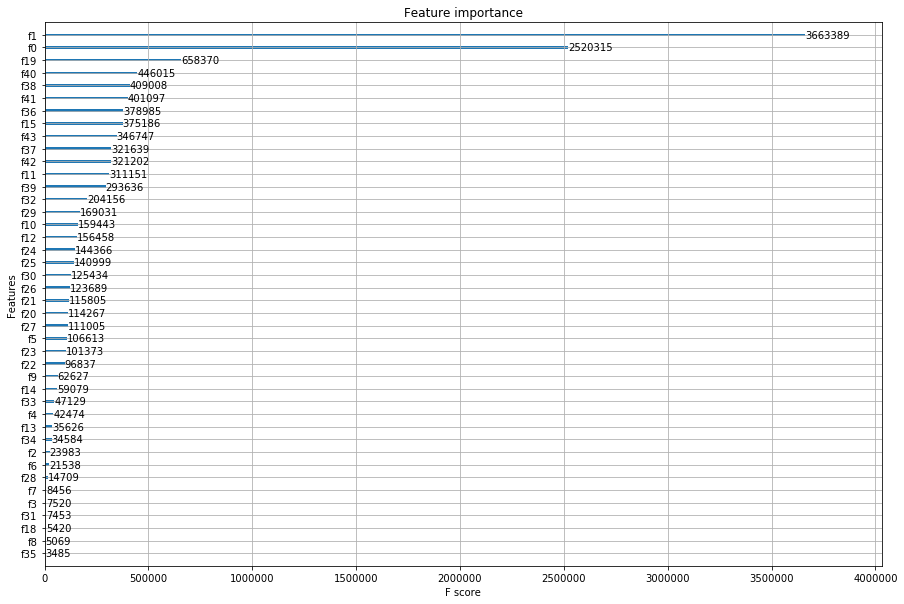

In [12]:
ax = xgb.plot_importance(bst)
fig = ax.figure
fig.set_size_inches(15, 10)

In [15]:
for idx, c in enumerate(final_features.columns.values):
    print('{}: {}'.format(idx, c))

0: location_raw
1: driver_age_raw
2: search_conducted
3: contraband_found
4: violation_bad_stop
5: violation_cell_phone
6: violation_display_of_plates
7: violation_equipment
8: violation_license
9: violation_lights
10: violation_moving_violation
11: violation_other
12: violation_registration
13: violation_safe_movement
14: violation_seatbelt
15: violation_speeding
16: violation_suspended_license
17: violation_traffic_control_signal
18: violation_window_tint
19: is_male
20: county_name_Fairfield County
21: county_name_Hartford County
22: county_name_Litchfield County
23: county_name_Middlesex County
24: county_name_New Haven County
25: county_name_New London County
26: county_name_Tolland County
27: county_name_Windham County
28: driver_race_Asian
29: driver_race_Black
30: driver_race_Hispanic
31: driver_race_Other
32: driver_race_White
33: stop_duration_1-15 min
34: stop_duration_16-30 min
35: stop_duration_30+ min
36: day_period_Afternoon
37: day_period_Evening
38: day_period_Morning


In [16]:
pred_2 = bst.predict(xg_test_2)

In [22]:
error_rate = np.sum(pred_2 != le.fit_transform(final_test_outcomes)) / final_test_outcomes.shape[0]
print('Test error using softmax [test_2] = {}'.format(error_rate))

Test error using softmax [test_2] = 0.06156346626496472


In [ ]:
from sklearn.utils import shuffle

ff2 = final_features.copy(deep=True)
ff2['stop_outcome'] = outcomes

ff2 = shuffle(ff2, random_state=8, n_samples=100000)
ff2_outcomes = le.fit_transform(ff2.pop('stop_outcome'))

xg_test_3 = xgb.DMatrix(ff2.values, label=ff2_outcomes)

pred_3 = bst.predict(xg_test_3)

error_rate_3 = np.sum(pred_2 != ff2_outcomes) / ff2_outcomes.shape[0]

print('Test error using softmax [test_3] = {}'.format(error_rate_3))

In [14]:
pickle.dump(bst, open('runs/201805111748-0.061-error-oversampled-bst.pkl', 'wb'))

In [ ]:
# from datetime import datetime
# import pickle

# timestamp = datetime.now().strftime('%Y%m%d%H%M%S')

# pickle(bst, open('{}-bst.pkl'.format(timestamp), 'wb')
# pickle(pred, open('{}-pred.pkl'.format(timestamp), 'wb')


### Plot results

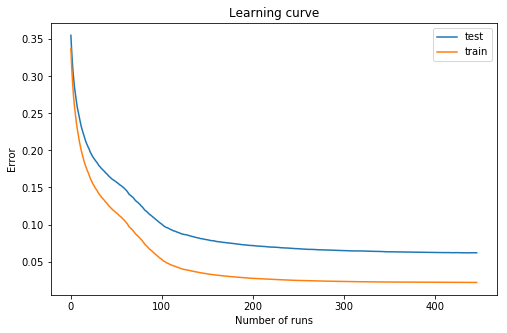

In [24]:
error_results = {
    'train': [],
    'test': [],
}

with open('xgboost-447_run-201805100107.log', 'r') as f:
    for line in f:
        tokens = line.strip().split('\t')
        error_results['train'].append(float(tokens[1].split(':')[1]))
        error_results['test'].append(float(tokens[2].split(':')[1]))

df_errors = pd.DataFrame(error_results)

learning_curve = df_errors.plot.line(title='Learning curve', figsize=(8,5))
learning_curve.set_xlabel('Number of runs')
learning_curve.set_ylabel('Error')

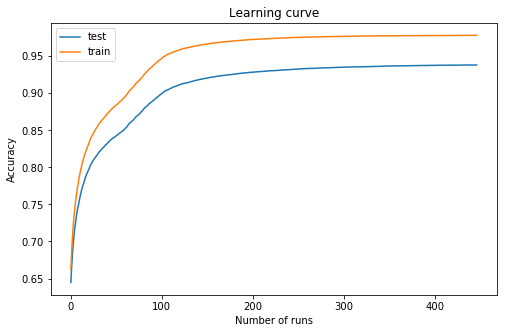

In [25]:
df_accuracy = df_errors.copy()
df_accuracy_processed = df_accuracy.mul(-1).add(1)

learning_curve = df_accuracy_processed.plot.line(title='Learning curve', figsize=(8,5))
learning_curve.set_xlabel('Number of runs')
learning_curve.set_ylabel('Accuracy')

In [32]:
final_model = final_features.copy(deep=True)
final_model['stop_outcome'] = outcomes
final_model.to_csv('runs/201805100107-0.062-error-final_model.csv')